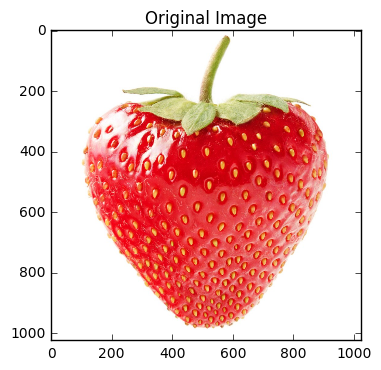

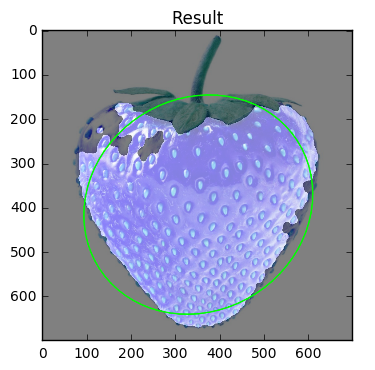

In [7]:
# Reference : Siraj Raval
# Siraj Raval's Link to code : https://youtu.be/OnWIYI6-4Ss    

from __future__ import division
import cv2
from matplotlib import pyplot as plt
import numpy as np
from math import cos, sin
    
def overlay_mask(mask_cleaned, image):
    mask_rgb = cv2.cvtColor(mask_cleaned, cv2.COLOR_GRAY2RGB)
    
    img = cv2.addWeighted(mask_rgb, 0.5, image, 0.5, 0)
    return img

def find_biggest_contour(img):
    image = img.copy()
    
    ret,thresh = cv2.threshold(img,127,255,0)

    im2, contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
      
    # Find the index of the largest contour
    areas = [cv2.contourArea(c) for c in contours]
    max_index = np.argmax(areas)
    cnt=contours[max_index]
    
    mask = np.zeros(image.shape, np.uint8)
    
    return cnt, mask
    
def circle_contour(image, contour):
    # Bounding Ellipse
    image_with_ellipse = image.copy()
    ellipse = cv2.fitEllipse(contour)
    
    return cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2, cv2.LINE_AA)

def find_strawberry(image):
    # Step 1 : Convert to corrct color scheme
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Step 2 : Scale Image Properly
    max_dimension = max(image_rgb.shape)
    scale = 700/max_dimension
    image_resized = cv2.resize(image_rgb, None, fx=scale, fy=scale)
    
    # Step 3 : Clean Image(Filter to remove noise, if any)
    image_blur = cv2.GaussianBlur(image_resized, (7,7), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    
    # Step 4 : Filter 
    # 4.1 : by Color
    min_red = np.array([0,100,80])
    max_red = np.array([10,256,256])
    
    mask1 = cv2.inRange(image_blur_hsv, min_red, max_red)
    
    # 4.2 : by Intensity/Brightness
    min_intensity = np.array([170,100,80])
    max_intensity = np.array([180,256,256])
    
    mask2 = cv2.inRange(image_blur_hsv, min_intensity, max_intensity)
    
    # 4.3 : combine Masks
    mask_combined = mask1 + mask2
    
    # Step 5 : Segmentation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
    
    # Dilation, then Erosion
    mask_closed = cv2.morphologyEx(mask_combined, cv2.MORPH_CLOSE, kernel)
    # Erosion, then Dilation
    mask_cleaned = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
    
    # Step 6 : Find biggest Strawberry
    big_strawberry_contour, mask_strawberries = find_biggest_contour(mask_cleaned)
    
    # Step 7 : Overlay
    overlay = overlay_mask(mask_cleaned, image_resized)
    
    # Step 8 : Circle the biggest Strawberry
    circled = circle_contour(overlay, big_strawberry_contour)
    
    return circled

image = cv2.imread('strawberry.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.title("Original Image")
plt.show()

result = find_strawberry(image)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
plt.title("Result")
plt.show()